In [1]:
import numpy as np
from matplotlib import pylab as plt
import pandas as pd 
from datetime import datetime as dt
from datetime import date

from poll_weight import add_poll_weights, cleanup_data, combine_districts 
from utils import election_stats, state_results, \
                  plot_electoral_vote_distribution, \
                    plot_nelectoral_vs_popular_vote
from utils import std_weighted, filter_state_polls

from simulation import simulate_elections

In [2]:
# Read in polling data 
url = './data/president_polls.csv'
pad = pd.read_csv(url)

In [3]:
pad = cleanup_data(pad)

In [15]:
states = pad['state'].unique()
states

array(['Texas', 'Wisconsin', 'Florida', 'North Carolina', 'Massachusetts',
       'Illinois', 'Michigan', 'Virginia', 'Nebraska', 'Nevada',
       'New Hampshire', 'Arizona', 'Georgia', 'Minnesota', 'Pennsylvania',
       'New Jersey', 'California', 'North Dakota', 'New York', 'Ohio',
       'Indiana', 'Alaska', 'South Carolina', 'Iowa', 'Utah', 'Maryland',
       'Delaware', 'Rhode Island', 'Montana', 'New Mexico', 'Connecticut',
       'Colorado', 'Maine', 'Missouri', 'Arkansas', 'Washington',
       'Oklahoma', 'Tennessee', 'West Virginia', 'Vermont', 'Oregon',
       'South Dakota', 'Louisiana', 'Hawaii', 'Alabama', 'Idaho',
       'Kansas', 'Kentucky', 'Mississippi', 'Wyoming'], dtype=object)

In [21]:
def plot_state_party_pct_histograms(df, state,i):
    """
    Filter the dataframe for a specific state and Democratic and Republican parties,
    then plot separate histograms of the 'pct' column for each party using matplotlib.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame containing polling data.
    state (str): The name of the state to filter for.
    """
    # Filter the dataframe for the specified state and Democratic and Republican parties
    state_df = df[(df['state'] == state) & (df['party'].str.lower().isin(['dem', 'rep']))]
    
    # Replace infinite values with NaN
    #state_df['pct'] = state_df['pct'].replace([np.inf, -np.inf], np.nan)
    
    # Separate DataFrames for each party
    dem_df = state_df[state_df['party'].str.lower() == 'dem']
    rep_df = state_df[state_df['party'].str.lower() == 'rep']
    
    # Set up the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot Democratic histogram
    ax1.hist(dem_df['pct'].dropna(), bins=20, color='blue', alpha=0.7, edgecolor='black')
    ax1.set_title(f'Democratic - {state}', fontsize=14)
    ax1.set_xlabel('Vote Share Percentage', fontsize=12)
    ax1.set_ylabel('Frequency', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Plot Republican histogram
    ax2.hist(rep_df['pct'].dropna(), bins=20, color='red', alpha=0.7, edgecolor='black')
    ax2.set_title(f'Republican - {state}', fontsize=14)
    ax2.set_xlabel('Vote Share Percentage', fontsize=12)
    ax2.set_ylabel('Frequency', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.savefig('./state_polls/%d_%s.png' % (i,state))
    plt.clf()
    
    # Print summary statistics
    print(f"Democratic polls in {state}: {len(dem_df)}")
    print(f"Republican polls in {state}: {len(rep_df)}")
    print("\nDemocratic percentages summary:")
    print(dem_df['pct'].describe())
    print("\nRepublican percentages summary:")
    print(rep_df['pct'].describe())

In [22]:
for i, state in enumerate(states):
    plot_state_party_pct_histograms(pad,state,i)

Democratic polls in Texas: 84
Republican polls in Texas: 84

Democratic percentages summary:
count    84.000000
mean     40.082143
std       3.921889
min      31.000000
25%      36.475000
50%      40.000000
75%      43.107500
max      48.000000
Name: pct, dtype: float64

Republican percentages summary:
count    84.000000
mean     45.872976
std       5.969525
min      29.000000
25%      44.000000
50%      47.200000
75%      49.925000
max      55.000000
Name: pct, dtype: float64
Democratic polls in Wisconsin: 243
Republican polls in Wisconsin: 243

Democratic percentages summary:
count    243.000000
mean      45.574074
std        4.428820
min       34.000000
25%       42.500000
50%       47.000000
75%       49.000000
max       53.100000
Name: pct, dtype: float64

Republican percentages summary:
count    243.000000
mean      45.172387
std        3.905783
min       28.000000
25%       43.000000
50%       45.600000
75%       47.800000
max       57.000000
Name: pct, dtype: float64
Democratic

Democratic polls in North Dakota: 5
Republican polls in North Dakota: 5

Democratic percentages summary:
count     5.000000
mean     29.380000
std       8.292889
min      17.000000
25%      28.000000
50%      29.900000
75%      32.000000
max      40.000000
Name: pct, dtype: float64

Republican percentages summary:
count     5.000000
mean     55.240000
std       5.127182
min      50.000000
25%      51.200000
50%      54.000000
75%      59.000000
max      62.000000
Name: pct, dtype: float64
Democratic polls in New York: 34
Republican polls in New York: 34

Democratic percentages summary:
count    34.000000
mean     48.850000
std       5.508465
min      37.000000
25%      46.000000
50%      48.500000
75%      52.000000
max      60.600000
Name: pct, dtype: float64

Republican percentages summary:
count    34.000000
mean     36.794118
std       4.162745
min      28.000000
25%      34.500000
50%      37.000000
75%      39.625000
max      44.800000
Name: pct, dtype: float64
Democratic polls i

C:\Users\Camer\AppData\Local\Temp\ipykernel_21496\3956389222.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


Democratic polls in Indiana: 8
Republican polls in Indiana: 8

Democratic percentages summary:
count     8.000000
mean     36.762500
std       5.775549
min      28.500000
25%      32.375000
50%      38.800000
75%      41.025000
max      43.000000
Name: pct, dtype: float64

Republican percentages summary:
count     8.000000
mean     51.662500
std       5.437945
min      44.500000
25%      46.775000
50%      53.400000
75%      55.500000
max      57.900000
Name: pct, dtype: float64
Democratic polls in Alaska: 11
Republican polls in Alaska: 11

Democratic percentages summary:
count    11.000000
mean     37.381818
std       5.617974
min      26.000000
25%      36.000000
50%      37.100000
75%      41.500000
max      43.100000
Name: pct, dtype: float64

Republican percentages summary:
count    11.000000
mean     48.600000
std       5.414795
min      37.000000
25%      46.000000
50%      49.000000
75%      53.000000
max      55.000000
Name: pct, dtype: float64
Democratic polls in South Caroli

Democratic polls in Tennessee: 30
Republican polls in Tennessee: 30

Democratic percentages summary:
count    30.000000
mean     28.060000
std       4.928426
min      18.000000
25%      24.250000
50%      28.500000
75%      31.225000
max      36.900000
Name: pct, dtype: float64

Republican percentages summary:
count    30.000000
mean     52.400000
std       6.858068
min      33.000000
25%      48.000000
50%      52.150000
75%      58.300000
max      63.100000
Name: pct, dtype: float64
Democratic polls in West Virginia: 4
Republican polls in West Virginia: 4

Democratic percentages summary:
count     4.000000
mean     28.350000
std       4.710626
min      22.500000
25%      26.625000
50%      28.450000
75%      30.175000
max      34.000000
Name: pct, dtype: float64

Republican percentages summary:
count     4.00000
mean     58.37500
std       2.52768
min      55.00000
25%      57.40000
50%      58.75000
75%      59.72500
max      61.00000
Name: pct, dtype: float64
Democratic polls in Ve

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

In [45]:
import matplotlib.dates as mdates

def plot_cumulative_polls(df, state,i):
    """
    Plot the cumulative number of polls as a function of time for a specific state.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame containing polling data.
    state (str): The name of the state to plot for.
    
    Returns:
    matplotlib.figure.Figure: The generated plot figure.
    """
    # Filter the dataframe for the specified state and Democratic and Republican parties
    state_df = df[(df['state'] == state) & (df['party'].str.lower().isin(['dem', 'rep']))].copy()
    
    # Separate DataFrames for each party and use only Democratic data
    dem_df = state_df[state_df['party'].str.lower() == 'dem'].copy()
    
    # Ensure end_date is in datetime format
    dem_df.loc[:, 'end_date'] = pd.to_datetime(dem_df['end_date'])
    
    # Sort by end_date
    dem_df = dem_df.sort_values('end_date')
    
    # Calculate cumulative count
    dem_df.loc[:, 'cumulative_count'] = range(1, len(dem_df) + 1)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(5, 5))
    
    ax.step(dem_df['end_date'], dem_df['cumulative_count'], color='blue')
    
    # Customize the plot
    ax.set_title(f'{state}', fontsize=16)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Cumulative Number of Polls', fontsize=12)
    
    # Format x-axis to show dates nicely
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    
    # Rotate and align the tick labels so they look better
    plt.gcf().autofmt_xdate()
    
    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Show the total number of polls
    total_polls = len(dem_df)
    ax.text(0.95, 0.95, f'Total Polls: {total_polls}', 
            verticalalignment='top', horizontalalignment='right',
            transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
    
    plt.tight_layout()
    plt.savefig('./CDF_polls/%d_%s.png' % (i,state))
    plt.clf()
    return fig

In [46]:
for i, state in enumerate(states):
    plot_cumulative_polls(pad,state,i)

C:\Users\Camer\AppData\Local\Temp\ipykernel_21496\404436630.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(5, 5))


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [56]:
def plot_cumulative_polls(df, state='all'):
    """
    Plot the cumulative number of polls as a function of time for a specific state or all states.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame containing polling data.
    state (str or list): The name of the state to plot for, or 'all' for all states, or a list of states.
    
    Returns:
    matplotlib.figure.Figure: The generated plot figure.
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    
    if state == 'all':
        states = df['state'].unique()
    elif isinstance(state, list):
        states = state
    else:
        states = [state]
    
    for state in states:
        # Filter the dataframe for the specified state and Democratic party
        state_df = df[(df['state'] == state) & (df['party'].str.lower() == 'dem')].copy()
        
        # Ensure end_date is in datetime format and sort
        state_df.loc[:, 'end_date'] = pd.to_datetime(state_df['end_date'])
        state_df = state_df.sort_values('end_date')
        
        # Calculate cumulative count
        state_df.loc[:, 'cumulative_count'] = range(1, len(state_df) + 1)
        
        # Plot for this state
        ax.plot(state_df['end_date'], state_df['cumulative_count'], label=state)
    
    # Customize the plot
    if len(states) == 1:
        ax.set_title(f'Cumulative Number of Polls Over Time in {states[0]}', fontsize=16)
    else:
        ax.set_title('Cumulative Number of Polls Over Time by State', fontsize=16)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Cumulative Number of Polls', fontsize=12)
    
    # Format x-axis to show dates nicely
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    
    # Rotate and align the tick labels so they look better
    plt.gcf().autofmt_xdate()
    
    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add legend
    if len(states) > 1:
        ax.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    #plt.yscale('log')
    return fig

C:\Users\Camer\AppData\Local\Temp\ipykernel_21496\475951936.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


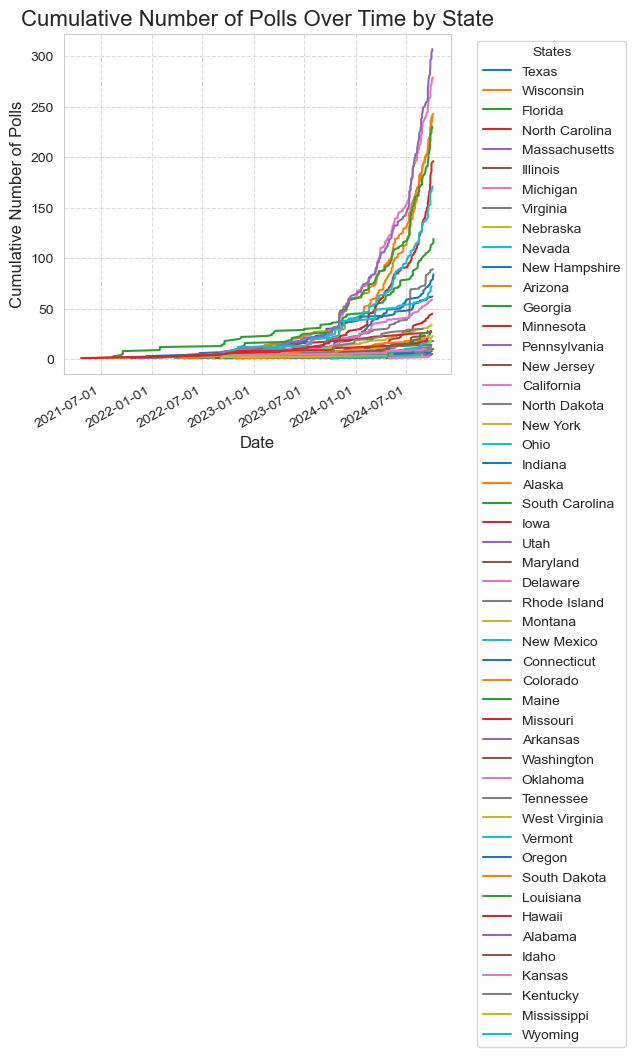

In [57]:
plot_cumulative_polls(pad)
plt.show()

In [72]:
def plot_cumulative_polls_n_states(df, n=5, top=True):
    """
    Plot the cumulative number of polls over time for the top N or bottom N states by poll count.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame containing polling data.
    n (int): The number of states to plot. Default is 5.
    top (bool): If True, plot top N states. If False, plot bottom N states. Default is True.
    
    Returns:
    matplotlib.figure.Figure: The generated plot figure.
    """
    # Count polls for each state
    state_poll_counts = df[df['party'].str.lower() == 'dem']['state'].value_counts()
    
    # Get top N or bottom N states
    if top:
        selected_states = state_poll_counts.head(n).index.tolist()
        title_prefix = f"Top {n}"
    else:
        selected_states = state_poll_counts.tail(n).index.tolist()
        title_prefix = f"Bottom {n}"

    # Create the figure
    fig, ax = plt.subplots(figsize=(10, 6))

    for state in selected_states:
        # Filter the dataframe for the specified state and Democratic party
        state_df = df[(df['state'] == state) & (df['party'].str.lower() == 'dem')].copy()
        
        # Ensure end_date is in datetime format and sort
        state_df.loc[:, 'end_date'] = pd.to_datetime(state_df['end_date'])
        state_df = state_df.sort_values('end_date')
        
        # Calculate cumulative count
        state_df.loc[:, 'cumulative_count'] = range(1, len(state_df) + 1)
        
        # Plot for this state
        ax.step(state_df['end_date'], state_df['cumulative_count'], lw=2,label=f"{state} ({len(state_df)})")
    
    # Customize the plot
    ax.set_title(f'{title_prefix} States by Number of Polls', fontsize=16)
    ax.set_xlabel('Date', fontsize=16)
    ax.set_ylabel('Cumulative Number of Polls', fontsize=15)
    
    # Format x-axis to show dates nicely
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    
    # Rotate and align the tick labels so they look better
    plt.gcf().autofmt_xdate()
    
    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add legend
    ax.legend(title='States (Total Polls)', loc='center left', bbox_to_anchor=(1, 0.5))

    plt.tight_layout()

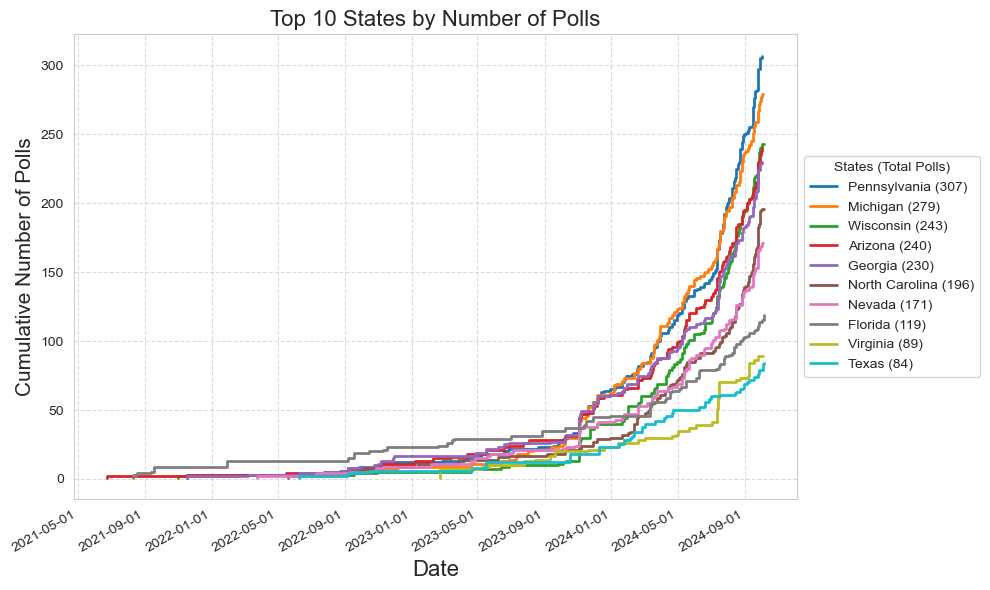

In [73]:
plot_cumulative_polls_n_states(pad,10)

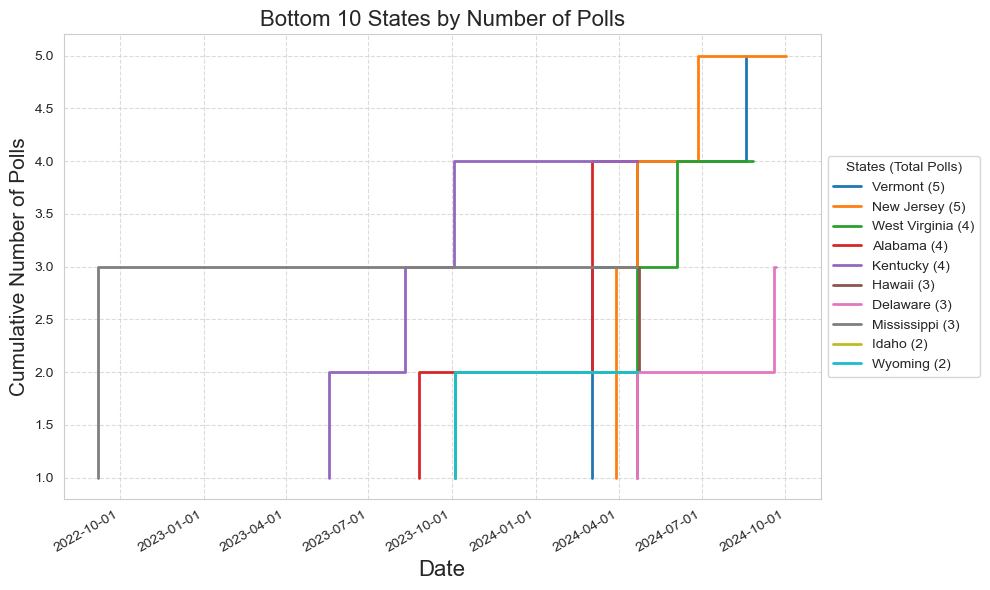

In [74]:
plot_cumulative_polls_n_states(pad,10,top=False)